In [1]:
from sklearn.datasets import load_digits
import pandas as pd

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [19]:
X = df.drop('target', axis='columns')
y = df.target

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

**Enseble** is used, when we use multiple algorithms to predicts the outcome.

As in **Random Forest** we are building multiple branches to predicts the output.

**Random Forest** shows to majority decision made by multiple branches.

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [21]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
model.score(X_test, y_test)

0.975

fine tuning the model

In [34]:
model = RandomForestClassifier(n_estimators=70)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

In [35]:
y_predicted = model.predict(X_test)

ploting a confusion matrix

In [41]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, y_predicted)
cn

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 32,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 32,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  2, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0, 37]], dtype=int64)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(69.0, 0.5, 'Truth')

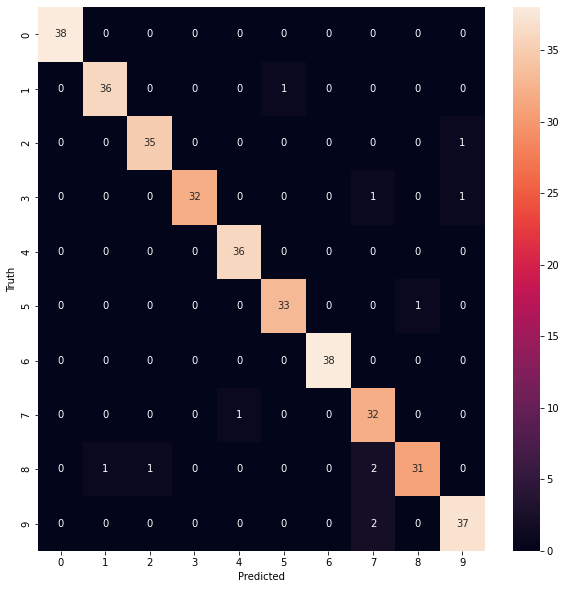

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(cn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')